# Machin Learning Model to predict the Restaurant Food Cost 

In [347]:
#data analysis and wrangling
import pandas as pd
import numpy as np

#visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing

#model developing-machine learning
import sklearn
from scipy.stats import zscore                                                          #for removing the outliers
from sklearn.preprocessing import StandardScaler                                        #for standardizing the input dataset
from sklearn.model_selection import train_test_split                                    #to train the model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error                                 #for reporting purposes

#boosting techniques
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

#saving the model using joblib
import pickle
#for filtering the warnings
import warnings
warnings.filterwarnings("ignore")

In [348]:
#acquiring the train data
data_train=pd.read_excel("C:/Users/Subhajit Roy/Desktop/Data_Train.xlsx")
data_test=pd.read_excel("C:/Users/Subhajit Roy/Desktop/Data_Test.xlsx")

In [349]:
print(data_train.shape)
print(data_test.shape)

(12690, 9)
(4231, 8)


In [350]:
data_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [351]:
data_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [352]:
data_train.info(), 
print("-------------------------------------------------------------"),
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB
-------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 no

In [353]:
data_train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [354]:
data_test.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [355]:
data_train['CITY'].value_counts()

Chennai                2174
Bangalore              2149
Hyderabad              1819
Mumbai                 1722
New Delhi              1321
                       ... 
Citypark                  1
Grant Road West           1
OMR Karapakkam            1
BK Guda                   1
Mumbai Andheri East       1
Name: CITY, Length: 359, dtype: int64

In [356]:
data_train.duplicated().sum()

25

In [357]:
data_test.duplicated().sum()

1

In [358]:
data_train= data_train.drop_duplicates()
data_test= data_test.drop_duplicates()

In [359]:
data_train['Location']=data_train['CITY']+' '+data_train['LOCALITY']
data_train.drop(columns=['CITY','LOCALITY'],inplace=True)
data_test['Location']=data_test['CITY']+' '+data_test['LOCALITY']
data_test.drop(columns=['CITY','LOCALITY'],inplace=True)

In [360]:
data_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,COST,Location
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.6,49 votes,1200,Thane Dombivali East
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),4.2,30 votes,1500,Chennai Ramapuram
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.8,221 votes,800,Chennai Saligramam
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),4.1,24 votes,800,Mumbai Bandra West
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),3.8,165 votes,300,Mumbai Lower Parel


In [361]:
data_train.dropna(subset=['Location'],inplace=True)

In [362]:
data_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,COST,Location
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.6,49 votes,1200,Thane Dombivali East
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),4.2,30 votes,1500,Chennai Ramapuram
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.8,221 votes,800,Chennai Saligramam
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),4.1,24 votes,800,Mumbai Bandra West
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),3.8,165 votes,300,Mumbai Lower Parel


In [363]:
#pip install fuzzywuzzy

In [364]:
from fuzzywuzzy import process
 
names_array=[]
correct_names=['Bangalore','Thane','Hyderabad','Andheri',
                'Delhi', 'Kerala','Chennai', 'Bandra',
                'Mumbai', 'Telangana','Kochi', 'Noida', 
                'Gurgaon', 'Ernakulam','Faridabad', 'Ghaziabad',
                'Secunderabad' ]
def match_names(wrong_names,correct_names):
    for row in wrong_names:
        x=process.extractOne(row, correct_names)
        if x[1]<65:
            names_array.append('Others')
        else:
            names_array.append(x[0])
    return names_array


name_match=match_names(data_train.Location,correct_names)    

print(len(names_array))
data_train['Location']=names_array


12552


In [365]:
data_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,COST,Location
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.6,49 votes,1200,Thane
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),4.2,30 votes,1500,Chennai
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.8,221 votes,800,Chennai
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),4.1,24 votes,800,Bandra
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),3.8,165 votes,300,Mumbai


In [366]:
data_test.apply(lambda col: col.drop_duplicates().reset_index(drop=True))

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,Location
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),4.3,564 votes,Noida Sector 18
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),4.2,61 votes,Mumbai Grant Road
2,None,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),3.8,350 votes,Mumbai Marine Lines
3,"FOOD TRUCK,DESSERT PARLOR",204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",3.6,1445 votes,Faridabad NIT
4,"DESSERT PARLOR,QUICK BITES",13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),3.7,23 votes,Kochi Kaloor
...,...,...,...,...,...,...,...
4122,NaN,1670,NaN,NaN,NaN,NaN,NaN
4123,NaN,9057,NaN,NaN,NaN,NaN,NaN
4124,NaN,8617,NaN,NaN,NaN,NaN,NaN
4125,NaN,6485,NaN,NaN,NaN,NaN,NaN


In [367]:
data_test.dropna(subset=['Location'],inplace=True)

In [368]:
names_array=[]
name_match=match_names(data_test.Location,correct_names)    

print(len(names_array))
data_test['Location']=names_array

4195


In [369]:
cuisines_list=[]
for row in data_train['CUISINES']:
    cuisines_list.append(list(row.split(',')))

data_train['CUISINES']=cuisines_list

cuisines_list=[]
for row in data_test['CUISINES']:
    cuisines_list.append(list(row.split(',')))

data_test['CUISINES']=cuisines_list

In [370]:
data_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,COST,Location
0,CASUAL DINING,9438,"[Malwani, Goan, North Indian]","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.6,49 votes,1200,Thane
1,"CASUAL DINING,BAR",13198,"[Asian, Modern Indian, Japanese]",6pm – 11pm (Mon-Sun),4.2,30 votes,1500,Chennai
2,CASUAL DINING,10915,"[North Indian, Chinese, Biryani, Hyderabadi]","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.8,221 votes,800,Chennai
3,QUICK BITES,6346,"[Tibetan, Chinese]",11:30am – 1am (Mon-Sun),4.1,24 votes,800,Bandra
4,DESSERT PARLOR,15387,[Desserts],11am – 1am (Mon-Sun),3.8,165 votes,300,Mumbai


In [371]:
df_train_cuisines=data_train['CUISINES'].apply(lambda x: pd.Series(1, x))
df_test_cuisines=data_test['CUISINES'].apply(lambda x: pd.Series(1, x))

In [372]:
df_train_cuisines.head()

,Malwani,Goan,North Indian,Asian,Modern Indian,Japanese,North Indian,Chinese,Biryani,Hyderabadi,...,Irish,Multi Cuisine,Jewish,Vegan,Oriental,Assamese,Modern Australian,Roast Chicken,Singaporean,Egyptian
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [373]:
title_list=[]
for row in data_train['TITLE']:
    title_list.append(list(row.split(',')))
    
data_train['TITLE']=title_list

title_list=[]
for row in data_test['TITLE']:
    title_list.append(list(row.split(',')))
    
data_test['TITLE']=title_list

In [374]:
df_train_title=data_train['TITLE'].apply(lambda x: pd.Series(1, x))
df_test_title=data_test['TITLE'].apply(lambda x: pd.Series(1, x))

In [375]:
df_train_title.head()

,CASUAL DINING,BAR,QUICK BITES,DESSERT PARLOR,CAFÉ,MICROBREWERY,BEVERAGE SHOP,IRANI CAFE,BAKERY,None,...,FOOD COURT,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [376]:
data_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,COST,Location
0,[CASUAL DINING],9438,"[Malwani, Goan, North Indian]","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.6,49 votes,1200,Thane
1,"[CASUAL DINING, BAR]",13198,"[Asian, Modern Indian, Japanese]",6pm – 11pm (Mon-Sun),4.2,30 votes,1500,Chennai
2,[CASUAL DINING],10915,"[North Indian, Chinese, Biryani, Hyderabadi]","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.8,221 votes,800,Chennai
3,[QUICK BITES],6346,"[Tibetan, Chinese]",11:30am – 1am (Mon-Sun),4.1,24 votes,800,Bandra
4,[DESSERT PARLOR],15387,[Desserts],11am – 1am (Mon-Sun),3.8,165 votes,300,Mumbai


In [377]:
data_train["RATING"] = data_train['RATING'].transform(lambda x : x.fillna(x.mode()[0]))

data_test["RATING"] = data_test['RATING'].transform(lambda x : x.fillna(x.mode()[0]))

In [378]:
data_train.VOTES.fillna('0',inplace=True)
data_train['VOTES']=data_train['VOTES'].str.extract('(\d+)').astype(int)

data_test.VOTES.fillna('0',inplace=True)
data_test['VOTES']=data_test['VOTES'].str.extract('(\d+)').astype(int)

In [379]:
data_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,RATING,VOTES,COST,Location
0,[CASUAL DINING],9438,"[Malwani, Goan, North Indian]","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",3.6,49,1200,Thane
1,"[CASUAL DINING, BAR]",13198,"[Asian, Modern Indian, Japanese]",6pm – 11pm (Mon-Sun),4.2,30,1500,Chennai
2,[CASUAL DINING],10915,"[North Indian, Chinese, Biryani, Hyderabadi]","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",3.8,221,800,Chennai
3,[QUICK BITES],6346,"[Tibetan, Chinese]",11:30am – 1am (Mon-Sun),4.1,24,800,Bandra
4,[DESSERT PARLOR],15387,[Desserts],11am – 1am (Mon-Sun),3.8,165,300,Mumbai


In [380]:
data_train.drop(['CUISINES','TITLE','TIME'],axis=1,inplace=True)

data_test.drop(['CUISINES','TITLE','TIME'],axis=1,inplace=True)

In [381]:
#converting sting data to int or float data using label encoder
from sklearn.preprocessing import LabelEncoder
le_x = LabelEncoder() 
for col in data_train.columns:
    data_train[col] = le_x.fit_transform(data_train[col])

    
#converting sting data to int or float data using label encoder
for col in data_test.columns:
    data_test[col] = le_x.fit_transform(data_test[col])

In [382]:
data_train = pd.concat([data_train,df_train_cuisines,df_train_title], axis=1)

data_test = pd.concat([data_test,df_test_cuisines,df_test_title], axis=1)

In [383]:
data_train.head()

,RESTAURANT_ID,RATING,VOTES,COST,Location,Malwani,Goan,North Indian,Asian,Modern Indian,...,FOOD COURT,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP
0,7137,17,46,36,17,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9992,23,27,43,3,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8282,19,218,28,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4836,22,21,28,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11650,19,162,14,12,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [384]:
data_test.head(5)

,RESTAURANT_ID,RATING,VOTES,Location,North Indian,Chinese,Mughlai,Kebab,South Indian,Fast Food,...,FOOD COURT,KIOSK,MESS,MICROBREWERY,CLUB,COCKTAIL BAR,MEAT SHOP,CONFECTIONERY,PAAN SHOP,BHOJANALYA
0,1081,23,530,13,1.0,1.0,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3347,22,59,12,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,345,18,338,12,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,42,18,909,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3540,16,21,11,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [385]:
data_train.fillna(0,inplace=True)
data_test.fillna(0,inplace=True)

In [386]:
data_train.head(5)

,RESTAURANT_ID,RATING,VOTES,COST,Location,Malwani,Goan,North Indian,Asian,Modern Indian,...,FOOD COURT,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP
0,7137,17,46,36,17,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9992,23,27,43,3,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8282,19,218,28,3,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4836,22,21,28,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11650,19,162,14,12,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [387]:
data_train.columns

Index(['RESTAURANT_ID', 'RATING', 'VOTES', 'COST', 'Location', 'Malwani',
       ' Goan', ' North Indian', 'Asian', ' Modern Indian',
       ...
       'FOOD COURT', 'FOOD TRUCK', 'MESS', 'KIOSK', 'CLUB', 'CONFECTIONERY',
       'DHABA', 'MEAT SHOP', 'COCKTAIL BAR', 'PAAN SHOP'],
      dtype='object', length=249)

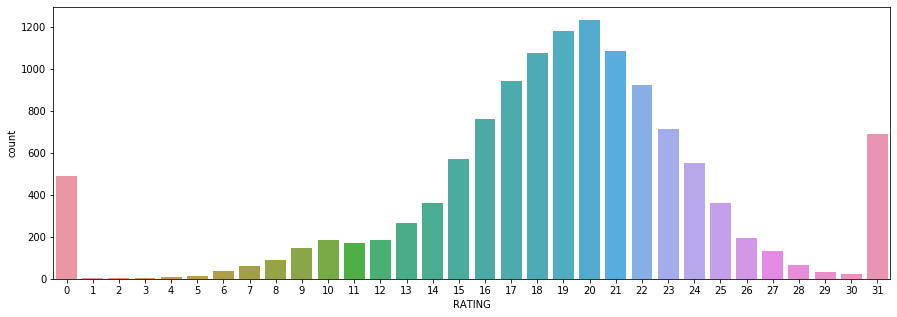

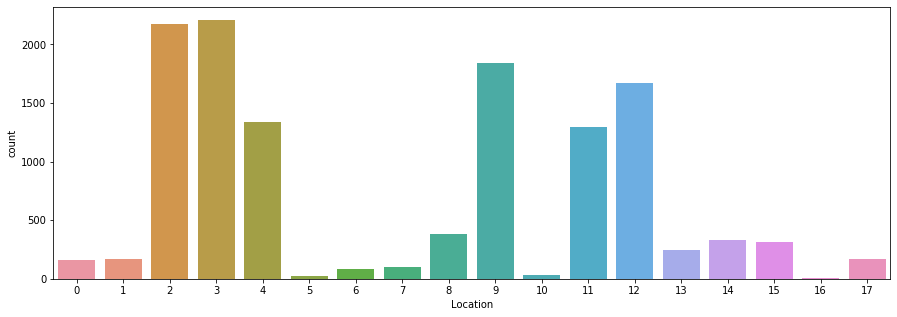

In [388]:
#printing different countplot
data_columns=['RATING', 'Location']
for i in range(len(data_columns)):
    fig,ax=plt.subplots(figsize=(15,5))
    sns.countplot(data=data_train,x=data_columns[i])

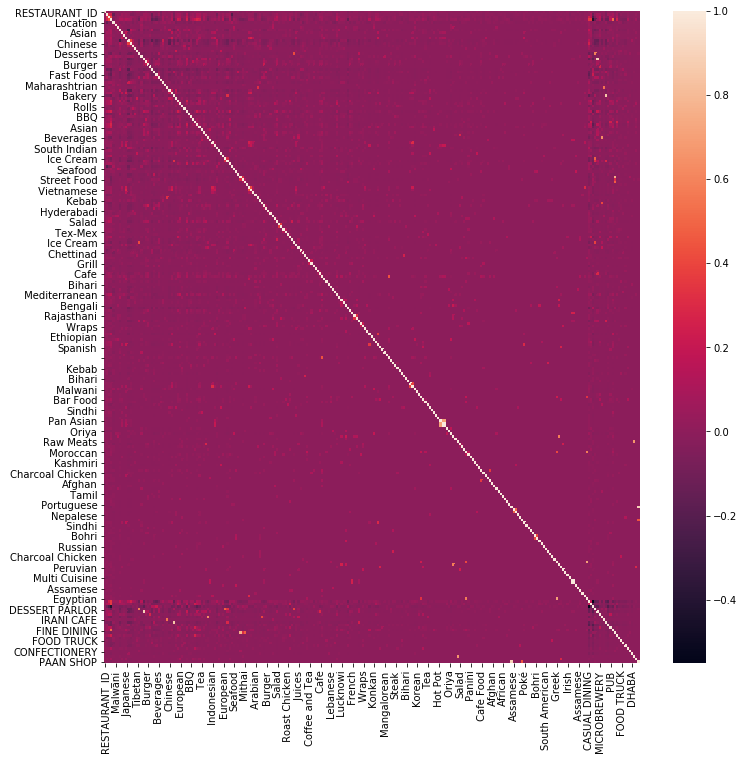

In [389]:
#checking for the correlation
corr_hmap=data_train.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_hmap)

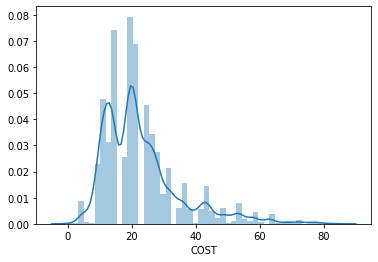

In [390]:
#vizualizing the distribution
sns.distplot(data_train["COST"],kde=True)

In [391]:
#Now separating input and output variable
x=data_train.drop(["COST",'RESTAURANT_ID'],axis=1)
y=data_train['COST']
print(x.shape)
print(y.shape)

(12552, 247)
(12552,)


In [392]:
#standardizing the input dataset 
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.28753583, -0.63683976,  2.24661464, ..., -0.01546166,
        -0.0218687 , -0.01996251],
       [ 0.68475666, -0.68345915, -0.89276827, ..., -0.01546166,
        -0.0218687 , -0.01996251],
       [ 0.03656167, -0.21481163, -0.89276827, ..., -0.01546166,
        -0.0218687 , -0.01996251],
       ...,
       [ 0.36065916,  0.73475166,  1.12540646, ..., -0.01546166,
        -0.0218687 , -0.01996251],
       [-0.44958457, -0.67855185, -0.89276827, ..., -0.01546166,
        -0.0218687 , -0.01996251],
       [-0.61163332,  0.89669268,  0.45268155, ..., -0.01546166,
        -0.0218687 , -0.01996251]])

In [393]:
#Machine Learning Models
models=[]
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', tree.DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))

In [394]:
r2_scr_results = []
names = []
for name, model in models:
    print(name)
    max_r2_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.10)
        model_name=model
        model_name.fit(x_train,y_train)
        y_pred=model_name.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("random state: ",r_state," accuracy score: ",r2_scr)
        if r2_scr>max_r2_score:
            max_r2_score=r2_scr      
            final_r_state=r_state
    r2_scr_results.append(max_r2_score*100)
    print()
    print("max accuracy score at random state:",final_r_state," for the model ",name," is: ",max_r2_score)
    print()
    print()

LR
random state:  42  accuracy score:  -3.400845268182819e+24
random state:  43  accuracy score:  -5.572387594046261e+24
random state:  44  accuracy score:  -1.0730545171096959e+26
random state:  45  accuracy score:  0.7491442781451637
random state:  46  accuracy score:  -1.7710456105511384e+27
random state:  47  accuracy score:  -1.6694221218739667e+25
random state:  48  accuracy score:  -7.636604577956948e+25
random state:  49  accuracy score:  -5.314182599596155e+25
random state:  50  accuracy score:  -1.9729235430226855e+24
random state:  51  accuracy score:  -9.672894739581078e+26
random state:  52  accuracy score:  -8.258390519071945e+24
random state:  53  accuracy score:  -1.8485087719716425e+25
random state:  54  accuracy score:  -9.943525715718571e+25
random state:  55  accuracy score:  -6.114450162367869e+24
random state:  56  accuracy score:  -1.3742650344150157e+25
random state:  57  accuracy score:  -4.5074542382924343e+24
random state:  58  accuracy score:  -2.45922549652

KeyboardInterrupt: 

In [395]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [396]:
y_pred = reg_rf.predict(x_test)

In [397]:
reg_rf.score(x_test, y_test)

0.769814252940978

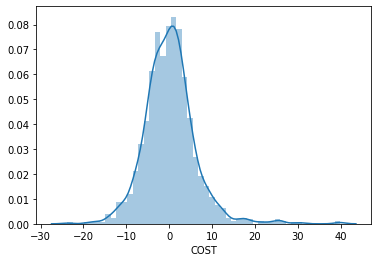

In [398]:
sns.distplot(y_test-y_pred)
plt.show()

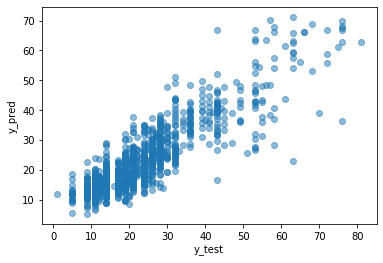

In [399]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [400]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4.345850970379886
MSE: 36.58366745186782
RMSE: 6.0484433908128645


In [401]:
metrics.r2_score(y_test, y_pred)

0.7698142529409779

In [402]:
from sklearn.model_selection import RandomizedSearchCV

In [403]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [404]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [405]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [406]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  20.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.7s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  19.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  18.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  15.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  14.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  24.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   7.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   7.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   7.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   7.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   7.7s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 39.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [407]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [408]:
prediction = rf_random.predict(x_test)

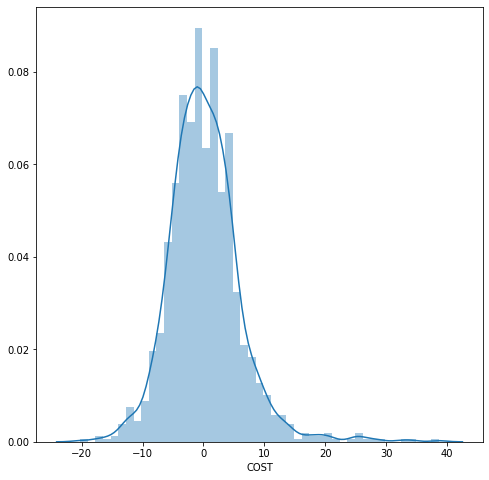

In [409]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [410]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 4.312111064048151
MSE: 35.199079691871844
RMSE: 5.932881230217898


In [411]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': [75, 100],'max_depth':[20, 30]}]
forest_reg = RandomForestRegressor(n_jobs=-1)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [412]:
grid_search.best_params_

{'max_depth': 30, 'n_estimators': 75}

In [413]:
from sklearn.metrics import r2_score
from sklearn.svm import SVC
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed r2_score report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, grid_search.predict(x_test)
    print(r2_score(y_true, y_pred))
    print()

-35.363 (+/-3.449) for {'max_depth': 20, 'n_estimators': 75}

Detailed r2_score report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

0.7713429013425257

-35.425 (+/-3.136) for {'max_depth': 20, 'n_estimators': 100}

Detailed r2_score report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

0.7713429013425257

-35.315 (+/-3.029) for {'max_depth': 30, 'n_estimators': 75}

Detailed r2_score report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

0.7713429013425257

-35.352 (+/-3.219) for {'max_depth': 30, 'n_estimators': 100}

Detailed r2_score report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

0.7713429013425257



In [415]:
#saving the model as pickle in a file
pickle.dump(grid_search,open('restaurant_data.pkl','wb'))

In [417]:
#loading the model for testing
loaded_model=pickle.load(open('restaurant_data.pkl','rb'))
loaded_model.predict(x_test)

array([15.15228814, 24.08778135, 21.62001209, ..., 21.12444444,
       16.6280708 , 24.69452769])